# Bin Packing Lab

- Authors:
  - Jinal Kasturiarachchi, kasturij@mcmaster.ca
  - Maged Armanios, armanm5@mcmaster.ca
- Group ID on Avenue: binpack 32
- Gitlab URL: https://gitlab.cas.mcmaster.ca/kasturij/l2-bin-packing

## How to use the provided code?

_(this section is just here for information, you can get rid of it in your own report)_

In [ ]:
from macpacking.reader import DatasetReader, BinppReader, JburkardtReader, SolutionReader
from macpacking.model  import Online, Offline
import macpacking.algorithms.offline as offline

Now that the business code is imported, we can load an existing dataset

In [ ]:
dataset = '_datasets/binpp/N1C1W1/N1C1W1_B.BPP.txt'
reader: DatasetReader = BinppReader(dataset)
print(f'Dataset: {dataset}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {sorted(reader.offline()[1])}')

Acording to the `oracle.xslx` file, we now that the optimal solution for this case is to use _31_ bins. Let's call the baseline algorithm, which is an offline one, and see how it performs.

In [ ]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

So the baseline finds the optimal solution. That's good news! Let's call our very own version of `NextFit`, as an offline algorithm.

In [ ]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

Damn it, this algorithm is 4 bins far from the optimal solution! Let's try an online version. Usually, they perform worst, so let's measure it.

In [ ]:
strategy: Online = online.NextFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

As expected, the online version is worst!

In [ ]:
c_file = '_datasets/jburkardt/p04_c.txt'
w_file = '_datasets/jburkardt/p04_w.txt'
reader: DatasetReader = JburkardtReader(c_file, w_file) 
print(f'Capacity File: {c_file}')
print(f'Weights File: {w_file}')
print(f'  - Bin Capacity: {reader.offline()[0]}')
print(f'  - Objects to pack: {(reader.offline()[1])}')

In [ ]:
import macpacking.algorithms.baseline as baseline
strategy: Offline = baseline.BenMaier()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

In [ ]:
import macpacking.algorithms.online as online
strategy: Offline = offline.NextFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

In [ ]:
strategy: Online = online.NextFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

## Explanation of how the code follows SOLID Principles

S: The single responsibility principle states that each class should only have one purpose. The sample code provided included four classes, these classes are BinPPReader, NextFit_ON, NextFit_Off, and BenMaier. Additionally there are other interfaces and abstract classes. Amongst the four, they only have one specific responsibility. BinPP is used to read data in the BinPP format, BenMaier solves the Binpacking problem using the BenmMaire algorithm, and the nextfit classes solve the problem using the nextfit algorithm (either offline or online).

O: The open closed principle states that objects or entities should be open for extension but closed for modification. In addition the the classes provided, the code includes a set of abstract classes. These include Online, Offline, and DatasetReader. These classes contain abstract methods that allow us to implement different algorithms/readers. Such as creating a specific data set reader to read the BinPP format without having to modify and existing code (Dataset reader) or implmenenting a new offline algorithm without having to modify current code (Abstract Class Offline)

L: Liskov's substitution principle states that properties on objects of a certain type T hold for objects of type S which are substypes of T. As of now we don't have any subclasses, rather we have implementations of abstract classes so we will forget about Liskov's rule for now

I: Interface segregation states that no code should be forced to depend on methods it does not use. The given code follows this principle by implementing abstract methods which are changed depending on the use case of the class. Such as \_load_data_from_disk() and \_process()

D: Dependancy Inversion has two components. 
1. High-level modules should not import anything from low-level modules; they should both depend on abstractions
2. Abstractions should not depend on concrete implementations; concrete implementations should depend on abstractions

The starting code does not violate either of these two rules. Online, offline, and Dataset reader do not depend on any concretions while BinppReader, BenMaier, Nextfit_off/On rely on abstract classes only and feature no imports from low level modules.

## Dimensions of the dataset

For the data, there are three parameters to take into account.
1. The amount of items 
2. The weights of each item
3. The bin capacity
These parameters are important because adjusting them can help us model real world problems. For example, in an amazon warehouse they may receive many items of small weights and have medium bin capacities. By using the datasets with these characteristics we can find the best algorithm for this scenario. 

## Demonstration of T2 Algorithms

In [ ]:
strategy: Online = online.FirstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

In [ ]:
strategy: Online = online.BestFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

In [ ]:
strategy: Online = online.WorstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

In [ ]:
strategy: Offline = offline.FirstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

In [ ]:
strategy: Offline = offline.BestFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

In [ ]:
strategy: Offline = offline.WorstFitOff()
result = strategy(reader.offline())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

## Analysis of the algorithms

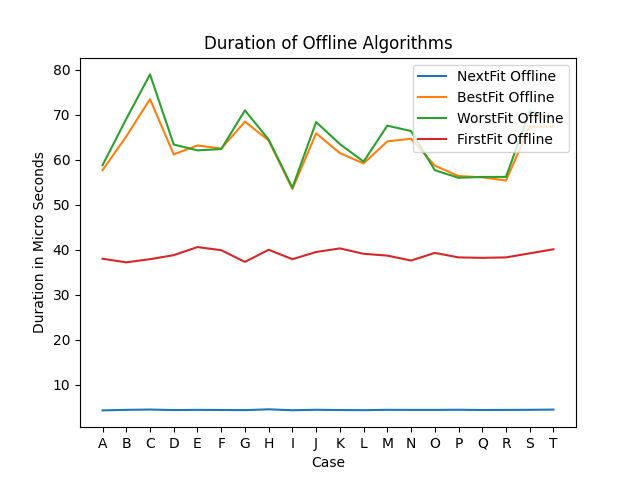

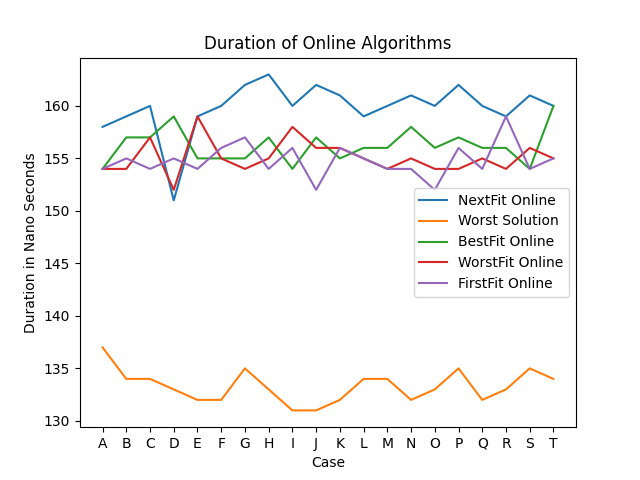

## Solution Reader

In [ ]:
fileList = ['./_datasets/binpp/N4C2W2/N4C2W2_A.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_B.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_C.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_D.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_E.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_F.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_G.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_H.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_I.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_J.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_K.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_L.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_M.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_N.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_O.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_P.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_Q.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_R.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_S.BPP.txt', './_datasets/binpp/N4C2W2/N4C2W2_T.BPP.txt']
solutionFile = './_datasets/solutions/binpp.csv'
reader = SolutionReader(fileList, solutionFile)
result = reader.readSolutions()
print(result)

## Improvement Margins

In [9]:
from analysis_tools.improvement_margin import run_analyze_correctness, list_case_files
from macpacking.algorithms.offline import NextFitOff as NFOff, WorstFitOff as WFOff, BestFitOff as BFOff, FirstFitOff as FFOff
from macpacking.algorithms.online import NextFitOn as NFOn, WorstSolution as WS, WorstFitOn as WFOn, BestFitOn as BFOn, FirstFitOn as FFOn
from analysis_tools.improvement_margin_grapher import plt_correct_percent, plt_correct_percent
import matplotlib.pyplot as plt


In [10]:
CASES = './_datasets/binpp/N1C3W2'
OFFLINE_STRATEGIES = [
    NFOff, WFOff, BFOff, FFOff,
]

ONLINE_STRATEGIES = [
    NFOn, WS, WFOn, BFOn, FFOn
]

cases = list_case_files(CASES)
[avg_excess,correct_percentage] = run_analyze_correctness(cases, OFFLINE_STRATEGIES + ONLINE_STRATEGIES)
# for funcName in avg_excess:
#     print(f'{funcName} mean excess {avg_excess[funcName]}')
#     print(f'{funcName} Correct % = {correct_percentage[funcName]}')
#     print()

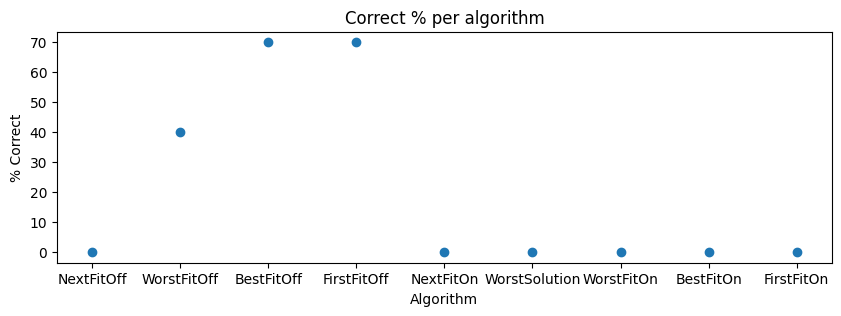

In [11]:
plt.figure(figsize=(10,3))
plt.scatter([i for i in correct_percentage], correct_percentage.values())
plt.xlabel('Algorithm')
plt.ylabel('% Correct')
plt.title('Correct % per algorithm')
plt.show()

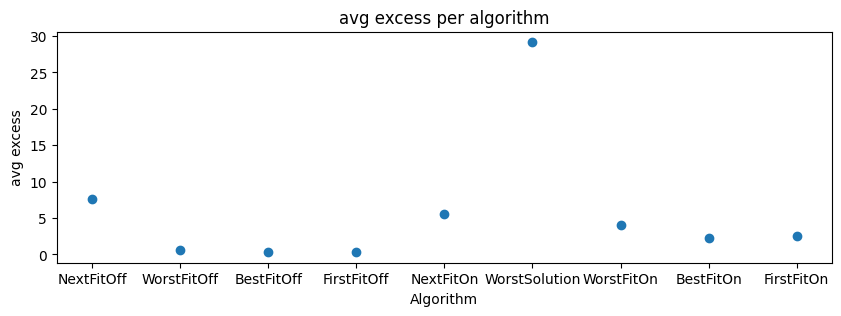

In [12]:
plt.figure(figsize=(10,3))
plt.scatter([i for i in avg_excess], avg_excess.values())
plt.xlabel('Algorithm')
plt.ylabel('avg excess')
plt.title('avg excess per algorithm')
plt.show()

## T4

In [ ]:
strategy: Offline = online.RefinedFirstFitOn()
result = strategy(reader.online())
print(f'nb_bins = {len(result)}')
print(f'{sorted(result)}')

## Self-reflection questions

As part of the self-reflection dimension of an experiential course, each member of the group is expected to answer to the following four questions:

  - What process did you go through to produce this result? (Backward)
  - What were your standards for this piece of work? Did you meet your standards? (Inward)
  - What the one thing you particularly want people to notice when they look at your work? (Outward)
  - What lessons will you keep from this reading/lecture in your professional practice? (Forward)